# Measuring X as a function of time

Sometimes we'd like to measure something as a function of elapsed wall clock time. QCoDeS provides a convenient default way of doing such a measurement, namely by using the `ElapsedTimeParameter`.

The main utility of having a default way of measuring time is the uniformity in data of different experiments.

In [1]:
import os

import numpy as np

from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from qcodes.instrument.parameter import Parameter
from qcodes.dataset import initialise_or_create_database_at
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.experiment_container import load_or_create_experiment
from qcodes.dataset.plotting import plot_dataset

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /home/vsts/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


Qcodes Logfile : /home/vsts/.qcodes/logs/200909-20244-qcodes.log


### Prepatory footwork: setup database and experiment

In [2]:
initialise_or_create_database_at(os.path.join(os.getcwd(), 'x_as_a_function_of_time.db'))
load_or_create_experiment('tutorial', 'no_sample')

0it [00:00, ?it/s]

Upgrading database; v0 -> v1: : 0it [00:00, ?it/s]

Upgrading database; v0 -> v1: : 0it [00:00, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v1 -> v2:   0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v1 -> v2: 100%|██████████| 1/1 [00:00<00:00, 724.40it/s]


0it [00:00, ?it/s]

Upgrading database; v2 -> v3: : 0it [00:00, ?it/s]

Upgrading database; v2 -> v3: : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Upgrading database; v3 -> v4: : 0it [00:00, ?it/s]

Upgrading database; v3 -> v4: : 0it [00:00, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v4 -> v5:   0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v4 -> v5: 100%|██████████| 1/1 [00:00<00:00, 619.27it/s]


0it [00:00, ?it/s]

Upgrading database; v5 -> v6: : 0it [00:00, ?it/s]

Upgrading database; v5 -> v6: : 0it [00:00, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v6 -> v7:   0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v6 -> v7: 100%|██████████| 1/1 [00:00<00:00, 357.05it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v7 -> v8:   0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v7 -> v8: 100%|██████████| 1/1 [00:00<00:00, 659.07it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v8 -> v9:   0%|          | 0/1 [00:00<?, ?it/s]

Upgrading database; v8 -> v9: 100%|██████████| 1/1 [00:00<00:00, 726.92it/s]

tutorial#no_sample#1@/home/vsts/work/1/s/docs/examples/DataSet/x_as_a_function_of_time.db
-----------------------------------------------------------------------------------------

## The measurement itself

We'll measure some Brownian motion. We set up a parameter for the noise.

In [3]:
noise = Parameter('noise', 
                  label='Position',
                  unit='m',
                  get_cmd=lambda: np.random.randn())
time = ElapsedTimeParameter('time')

In [4]:
meas = Measurement()
meas.register_parameter(time)
meas.register_parameter(noise, setpoints=[time])

In [5]:
with meas.run() as datasaver:
    pos = 0
    time.reset_clock()
    for _ in range(100):
        pos += noise()
        now = time()
        datasaver.add_result((noise, pos), (time, now))
        
dataset = datasaver.dataset

Starting experimental run with id: 1. 


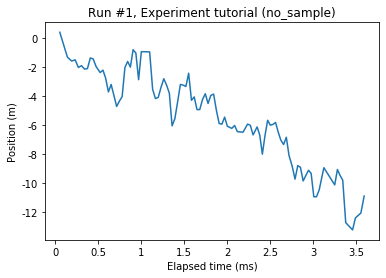

In [6]:
axs, cbs = plot_dataset(dataset)